<a href="https://colab.research.google.com/github/marquesgabi/Doutorado/blob/master/PSD_hist_FINAL_CNN_B_Amostra7_r_squared%2BMC_set_13_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [2]:
!pip install mahotas

     |████████████████████████████████| 5.7 MB 4.6 MB/s 


In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip' 
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 458, done.
remote: Counting objects: 100% (208/208), done.
remote: Compressing objects: 100% (207/207), done.
remote: Total 458 (delta 98), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (458/458), 203.19 MiB | 19.16 MiB/s, done.
Resolving deltas: 100% (215/215), done.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
labels =[]
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)
print(labels)

['Fotos_Grandes-3cdAmostra/Q6-8-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-1.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-1.jpg', 'Fotos_Grandes-3cdAmostr

In [7]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[2] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [8]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 163 (delta 65), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 21.97 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [9]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [10]:
df=Segmenta(img)
Img_Size = 28

In [11]:
print(df)

    Width           0           1  ...         781         782         783
0     101  103.174889   97.297623  ...   11.677385   11.983727   13.028723
1     120  135.070007  134.073334  ...  119.756668  119.318878  118.144447
2     137   99.868721   99.036819  ...  121.828056  127.388397  127.369423
3     120  116.651115  120.628883  ...   11.074445   11.608890   11.811110
4     191  139.489441  141.951660  ...  130.696426  129.628891  127.732658
5     197  108.217926  142.040085  ...   94.424240   90.486237   88.290039
6     158  111.992943  113.147552  ...  130.241791  124.456497  118.156227
7     126  134.716049  131.037048  ...  178.382721  190.234558  199.592590
8     179  117.570892  120.173256  ...   67.417030   74.917580   75.857559
9     165  147.214996  141.395340  ...  195.383041  208.187485  203.134705
10    181   65.331741   71.974152  ...  160.365417  163.839401  162.376938
11    151  128.914429  128.391663  ...  136.479187  142.835312  144.772949
12    188  123.824806  12

In [12]:
'''
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
# filename = 'model_ANN.pkl'
filename = 'model_ANN_new.pkl'
model = joblib.load(filename)
'''

"\n!git clone https://github.com/ucfilho/MarquesGabi_Routines\n%cd MarquesGabi_Routines\n# filename = 'model_ANN.pkl'\nfilename = 'model_ANN_new.pkl'\nmodel = joblib.load(filename)\n"

In [13]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 163 (delta 65), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 22.42 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [14]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [15]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [16]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = '3 layers of Convolution: 64, 128, 256 '
N1 = 20
N2 = 20

# make the CNN
model = Sequential()
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=N1))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:

# training the model
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)

Epoch 1/200
11/11 [==============================] - 3s 154ms/step - loss: 0.5226 - accuracy: 0.7755 - val_loss: 0.6931 - val_accuracy: 0.5102
Epoch 2/200
11/11 [==============================] - 1s 133ms/step - loss: 0.2623 - accuracy: 0.8659 - val_loss: 0.6935 - val_accuracy: 0.5102
Epoch 3/200
11/11 [==============================] - 1s 128ms/step - loss: 0.1494 - accuracy: 0.9329 - val_loss: 0.6949 - val_accuracy: 0.5102
Epoch 4/200
11/11 [==============================] - 1s 128ms/step - loss: 0.0927 - accuracy: 0.9679 - val_loss: 0.6969 - val_accuracy: 0.5102
Epoch 5/200
11/11 [==============================] - 2s 140ms/step - loss: 0.0777 - accuracy: 0.9708 - val_loss: 0.6962 - val_accuracy: 0.5102
Epoch 6/200
11/11 [==============================] - 1s 130ms/step - loss: 0.0941 - accuracy: 0.9708 - val_loss: 0.6955 - val_accuracy: 0.5102
Epoch 7/200
11/11 [==============================] - 1s 132ms/step - loss: 0.0479 - accuracy: 0.9825 - val_loss: 0.6986 - val_accuracy: 0.5102

In [18]:
Y_test = yback(Y_test)

In [19]:
pred_test= model.predict(X_test)
Rows, Cols = pred_test.shape
Prediction =[]
for i in range(Rows):
  if(pred_test[0,0] > pred_test[0,1]):
    Prediction.append(0)
  else:
    Prediction.append(1)

In [20]:
# pred_test= model.predict_classes(X_test)
pred_test = np.argmax(model.predict(X_test), axis=-1)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']
  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

Predict   1
Actual     
0        72
1        75


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
print(METRICS)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.51      1.00      0.68        75

    accuracy                           0.51       147
   macro avg       0.26      0.50      0.34       147
weighted avg       0.26      0.51      0.34       147



In [22]:
#pred_test

In [23]:
cont = 0; num =25
img_graos = []
Width_new = []
img=ww[2] 
while( cont < num):
  df=Segmenta(img)
  df_ann =df.copy()
  Width = df['Width']
  del df_ann['Width']
  result = np.array(df_ann)
  result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
  prediction_02 = model.predict(result)
  Rows, Cols = prediction_02.shape
  Prediction =[]
  for i in range(Rows):
    if(prediction_02[0,0] > prediction_02[0,1]):
      Prediction.append(0)
    else:
      Prediction.append(1)
  loc_grao =[];k=0
  for i in Prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      Width_new.append(Width.iloc[k])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

    Width           0           1  ...         781         782         783
0   111.0   39.139114   35.777046  ...    0.000000    0.000000    0.000000
1   181.0   64.611183   70.103752  ...    8.125424    7.489546    8.058760
2   142.0  159.149979  148.153336  ...  102.377907  103.613174  105.808380
3   137.0  143.328781  141.488724  ...  144.816925  141.923798  138.413239
4   182.0   34.893494   27.840239  ...   65.124260   80.319527  126.071022
5   179.0   99.614624  100.183823  ...  112.516174  132.455139  133.112106
6   139.0    0.000000    0.000000  ...   41.692921   41.147972   40.521713
7   152.0  178.719528  177.253464  ...  133.371185  132.650970  133.094864
8   185.0   96.681129  132.600784  ...  142.305817  147.257141  144.821838
9   161.0   83.606804   74.506622  ...   58.155014   57.255203   54.892254
10  165.0  145.567719  146.000992  ...  141.905365  139.257034  139.172775
11  126.0   99.790123   99.172844  ...   52.296299   28.703703    5.938272
12  161.0   75.652176   7

In [24]:
Width=np.array(Width_new)

In [25]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 692, done.
remote: Counting objects: 100% (453/453), done.
remote: Compressing objects: 100% (451/451), done.
remote: Total 692 (delta 285), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (692/692), 5.65 MiB | 13.51 MiB/s, done.
Resolving deltas: 100% (422/422), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [26]:
#!git clone https://github.com/ucfilho/marquesgabi_out_2020
!git clone https://github.com/marquesgabi/Doutorado

%cd Doutorado

PSD_imageJ = 'Amostra7.csv' 
PSD_new = pd.read_csv(PSD_imageJ,sep=';')
#encoding='utf8'
print(PSD_new.head(3))

Cloning into 'Doutorado'...
remote: Enumerating objects: 458, done.
remote: Counting objects: 100% (208/208), done.
remote: Compressing objects: 100% (207/207), done.
remote: Total 458 (delta 98), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (458/458), 166.03 MiB | 23.36 MiB/s, done.
Resolving deltas: 100% (221/221), done.
Checking out files: 100% (90/90), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/Doutorado
   Unnamed: 0   Area
0           1  1.387
1           2  1.626
2           3  1.336


In [27]:
PSD_new.shape

(102, 2)

In [28]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [29]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,111.0,39.139114,35.777046,34.969563,31.241135,28.902523,28.072720,25.939939,20.325462,42.173687,95.541428,127.498009,133.011688,124.186516,113.438354,111.186424,112.927200,112.789948,113.845230,116.288612,116.469116,115.610985,110.651321,97.152580,83.539726,85.084084,84.607338,82.277412,80.693123,47.732246,44.228310,34.752861,30.267998,27.090820,26.933039,20.677055,19.302168,62.780128,103.158340,115.743607,...,31.057219,15.418228,2.361415,2.694668,1.510348,1.449476,0.990991,0.205340,0.000000,0.000000,0.000000,0.000000,0.368233,0.379434,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.405405,0.928577,1.144144,1.710170,2.688581,1.604578,1.520493,2.127262,1.878013,1.252252,1.000000,0.973216,0.504505,0.104537,0.000000,0.000000,0.000000,0.000000
1,181.0,64.611183,70.103752,91.097931,108.381950,115.860672,117.034187,107.872879,104.763741,106.575241,107.299995,104.803528,103.313156,106.252319,113.190453,122.381989,133.801666,148.853531,156.481628,158.514191,160.457169,148.662247,124.059845,104.241844,96.861427,90.854767,77.062462,71.725288,67.748604,68.823151,63.900650,104.141609,126.701180,125.180351,123.899368,118.144478,108.938591,106.880112,106.651787,105.039040,...,0.306798,0.274870,0.312231,0.346967,0.229663,0.191630,0.259089,0.395653,0.416074,0.298251,0.425597,0.429016,8.535667,6.537438,7.978420,7.465493,7.734105,7.934832,7.896371,7.737402,7.251092,7.553647,7.557920,7.827997,7.864748,7.998078,8.616007,7.858765,7.756204,8.124874,8.101189,7.728000,7.938463,7.808980,7.076586,7.842556,7.570008,8.125424,7.489546,8.058760
2,142.0,159.149979,148.153336,119.222572,85.171791,89.834557,102.524101,106.470345,108.921844,111.158707,112.365997,115.557823,117.473328,115.376907,115.055550,121.093643,132.005356,147.896439,154.822845,130.740128,127.963699,127.111885,121.867691,117.165848,113.555046,111.993454,110.481056,107.501289,103.672684,159.926010,154.293396,140.522324,112.456856,107.682205,112.384453,113.415794,114.342987,117.290413,120.091064,120.925026,...,127.639359,123.096207,116.448914,113.212250,106.395561,101.833366,99.927193,100.855980,102.337433,103.208298,105.419159,109.880592,152.138062,146.487213,142.609009,140.225754,139.951614,137.777420,141.731812,148.103943,155.255127,158.551300,149.034317,124.633217,119.476295,119.024803,119.664154,123.366592,126.541557,124.058327,117.693520,113.539581,107.348946,101.805206,99.661377,99.332481,100.984932,102.377907,103.613174,105.808380
3,137.0,143.328781,141.488724,145.284729,150.819275,153.772766,158.294357,160.300430,160.583344,165.866959,170.467743,163.890442,94.249138,79.242363,72.557083,75.949959,80.732857,86.125679,110.439819,133.223770,137.868042,138.710205,136.883057,132.596725,127.895676,128.467163,127.266968,127.784210,126.764771,135.089142,136.179871,143.785324,147.929520,155.417175,163.004486,162.746918,160.860291,166.854858,171.376801,163.480942,...,144.650223,146.899033,149.801376,152.468964,155.057755,153.420273,150.561508,148.615845,147.023651,143.221863,138.927902,135.946289,175.447968,180.413605,182.691299,183.029938,170.151031,125.751129,123.149132,123.688095,123.134422,121.415527,123.561829,127.440025,131.973465,135.291168,138.049713,142.178635,145.094879,147.015289,149.574188,151.419998,150.910583,151.027481,149.799179,149.104736,147.525879,144.816925,141.923798,138.413239
4,182.0,34.893494,27.840239,22.124262,18.798819,11.473374,7.082841,70.810654,136.467468,145.284027,155.366867,182.573975,153.082855,131.680481,186.461548,201.958603,59.828407,88.502960,92.668640,91.497055,93.840240,97.804741,98.573975,92.615402,35.621304,4.011835,2.946746,4.781066,53.443790,69.745567,73.295860,82.964508,89.272202,99.473373,94.917168,127.402374,138.479279,144.017761,151.686401,169.17

In [30]:
#lost_value = float(PSD_new.columns[1])

# Area = np.array(PSD_new.iloc[:,1])
Area = PSD_new['Area'].values
# Area = np.concatenate( (Area, [lost_value] ) )
# Area = np.concatenate( (Area, [lost_value] ) )
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

In [31]:
PSD_new.iloc[:,1].values

array([1.387, 1.626, 1.336, 0.64 , 2.211, 1.12 , 0.974, 1.237, 1.29 ,
       3.755, 2.778, 1.256, 1.386, 1.302, 1.071, 1.497, 1.518, 1.244,
       1.532, 1.325, 1.519, 1.895, 1.22 , 1.241, 1.301, 1.429, 0.667,
       2.157, 1.052, 2.082, 1.517, 1.281, 0.784, 1.067, 2.764, 1.215,
       0.943, 2.182, 1.486, 1.569, 2.667, 0.709, 1.006, 1.6  , 1.408,
       3.16 , 2.465, 2.284, 1.273, 1.256, 3.021, 1.701, 1.955, 5.248,
       1.627, 1.367, 1.592, 2.718, 1.658, 1.128, 2.192, 1.508, 2.547,
       1.945, 1.606, 3.482, 1.756, 1.457, 1.864, 1.821, 1.314, 1.715,
       1.015, 1.345, 1.265, 1.844, 1.396, 1.785, 1.694, 1.413, 1.368,
       2.21 , 1.034, 1.367, 1.943, 1.008, 1.279, 1.579, 1.444, 1.879,
       1.466, 2.154, 1.794, 3.149, 1.883, 1.692, 1.163, 1.297, 2.949,
       1.09 , 1.444, 1.524])

In [32]:
X.shape

(490, 784)

<BarContainer object of 6 artists>

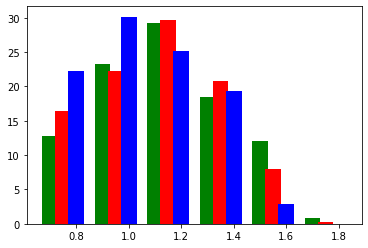

In [33]:
Freq = [12.8, 23.2, 29.2, 18.4, 12.0, 0.8]
Freq2 = [16.4, 22.2, 29.6, 20.8, 8., 0.2]
Freq3 = [22.22489, 30.15078, 25.10463, 19.30926, 2.810434, 0.]
barWidth = 0.25

br1 = range(len(Freq))
# Set position of bar on X axis
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
labels = [0.8, 1.0, 1.2, 1.4, 1.6, 1.8]

xx=[]
for a in labels:
  xx.append(str(a))
plt.bar(br1, Freq , color="green", align="center", width=0.3, tick_label= xx) 
plt.bar(br2, Freq2 , color="red", align="center", width=0.3, tick_label= xx)
plt.bar(br3, Freq3 , color="blue", align="center", width=0.3, tick_label= xx)

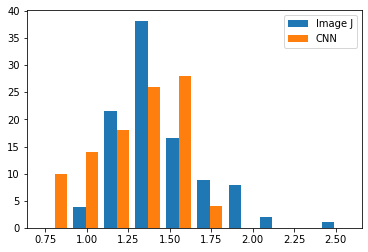

In [34]:
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts)
plt.legend(['Image J','CNN'])

(array([[0.        , 0.03921569, 0.25490196, 0.6372549 , 0.80392157,
         0.89215686, 0.97058824, 0.99019608, 0.99019608, 1.        ],
        [0.1       , 0.24      , 0.42      , 0.68      , 0.96      ,
         1.        , 1.        , 1.        , 1.        , 1.        ]]),
 array([0.71139016, 0.89874604, 1.08610192, 1.2734578 , 1.46081368,
        1.64816956, 1.83552544, 2.02288132, 2.2102372 , 2.39759308,
        2.58494896]),
 <a list of 2 Lists of Patches objects>)

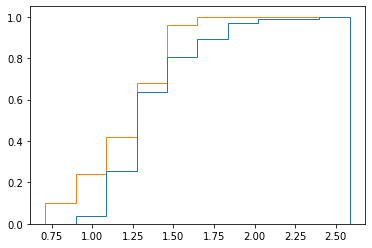

In [35]:
# plt.hist(x, bins=bins, density=True, histtype='step', cumulative=-1,label='Reversed emp.')
plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')

r_squared = 0.921862636972828


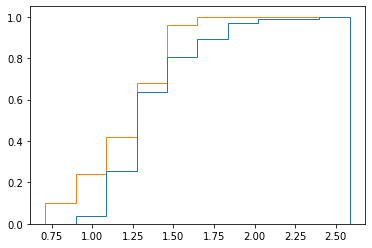

In [36]:
Obj = plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')
Y1, Y2 = Obj[0]
Rsquared = r2_score(Y1, Y2)
print('r_squared =',Rsquared)

In [37]:
acc_train = r.history['accuracy'][-1]
acc_test = r.history['val_accuracy'][-1]
loss_train = r.history['loss'][-1]
loss_test = r.history['val_loss'][-1]

In [38]:
df = pd.DataFrame({'N1':N1, 'N2':N2,'R^2':Rsquared,
                   'acc train':acc_train,'acc test':acc_test,
                   'loss train':loss_train,'loss test':loss_test,
                   'Details':Description},
                  index= [0])


In [39]:
df

,N1,N2,R^2,acc train,acc test,loss train,loss test,Details
0,20,20,0.921863,0.997085,0.510204,0.003307,7.567057,"3 layers of Convolution: 64, 128, 256"


<a list of 2 Lists of Patches objects>
[0.71139016 0.89874604 1.08610192 1.2734578  1.46081368 1.64816956
 1.83552544 2.02288132 2.2102372  2.39759308 2.58494896]
[[ 0.          3.92156863 21.56862745 38.23529412 16.66666667  8.82352941
   7.84313725  1.96078431  0.          0.98039216]
 [10.         14.         18.         26.         28.          4.
   0.          0.          0.          0.        ]]


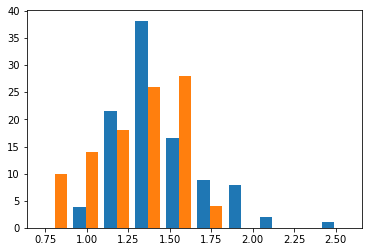

In [40]:
counts, bins, bars = plt.hist(X,weights=wts)
print(bars)
print(bins)
print(counts)

In [41]:
print(counts.sum())

200.0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


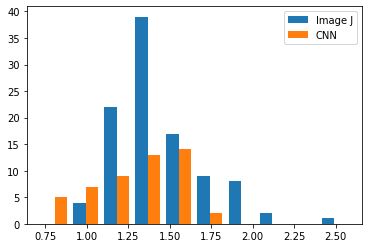

In [42]:

plt.hist([Diam1,Diameter_All])
plt.legend(['Image J','CNN'])


In [43]:
[Diam1,Diameter_All]

[[1.3289030245084366,
  1.4388493665910183,
  1.3042423209535017,
  0.9027033336764101,
  1.6778356991700483,
  1.1941642642883694,
  1.113613629842976,
  1.254988970803089,
  1.2815923738491737,
  2.186553107171316,
  1.8807071689325485,
  1.2645903954195463,
  1.3284238815238665,
  1.2875394701698204,
  1.1677497815933682,
  1.3805939296073044,
  1.3902437300372827,
  1.2585348599266302,
  1.3966398900698307,
  1.2988619621707653,
  1.3907015741893414,
  1.5533154661153457,
  1.2463355264843006,
  1.2570164179581493,
  1.2870449283923413,
  1.3488733481786004,
  0.9215480325725586,
  1.6572198701420842,
  1.157345238492556,
  1.6281537802488464,
  1.3897857350553149,
  1.2771138777750963,
  0.9991095050455518,
  1.165567069812981,
  1.875962180228586,
  1.2437789380968078,
  1.0957485526731296,
  1.6667959343039342,
  1.3755122549350303,
  1.413404699896484,
  1.8427506249649406,
  0.9501193805081709,
  1.1317592420667806,
  1.4272992929222168,
  1.3389254195014408,
  2.0058506827187

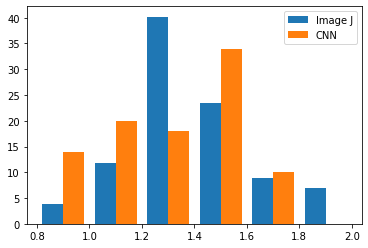

In [44]:
 bins_list = [0.8, 1.0, 1.2, 1.4,1.6, 1.8,2.0]
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts,bins = bins_list)
plt.legend(['Image J','CNN'])

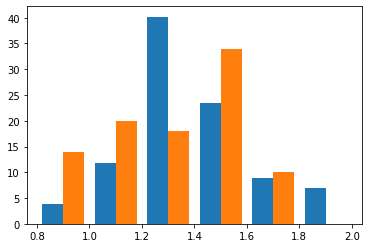

In [45]:
yy = plt.hist(X,weights=wts,bins = bins_list)

In [46]:
yy[0][0]

array([ 3.92156863, 11.76470588, 40.19607843, 23.52941176,  8.82352941,
        6.8627451 ])

In [47]:
bins_list

[0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]

In [48]:
k =0
for kk in yy[0][0]:
  name = str(bins_list[k])
  df[name] = yy[0][1][k]
  k = k+1

In [49]:
df

,N1,N2,R^2,acc train,acc test,loss train,loss test,Details,0.8,1.0,1.2,1.4,1.6,1.8
0,20,20,0.921863,0.997085,0.510204,0.003307,7.567057,"3 layers of Convolution: 64, 128, 256",14.0,20.0,18.0,34.0,10.0,0.0


In [50]:
Arq = "output.xlsx"
df.to_excel(Arq)
files.download(Arq)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>